In [2]:
import torch
from diffusers import StableDiffusionInstructPix2PixPipeline, EulerAncestralDiscreteScheduler

model_id = "timbrooks/instruct-pix2pix"
pipe = StableDiffusionInstructPix2PixPipeline.from_pretrained(model_id, torch_dtype=torch.float16, safety_checker=None)
pipe.to("cuda")
pipe.scheduler = EulerAncestralDiscreteScheduler.from_config(pipe.scheduler.config)

Loading pipeline components...:   0%|          | 0/6 [00:00<?, ?it/s]

In [3]:
from datasets import load_dataset

ds = load_dataset("tingtingou/rf_train_100_inst")

In [4]:
instructions = ds["train"][0]['instruction'].split(";")
print(instructions)

['Add more Italian architectural elements', ' Extend coastline with Mediterranean features', ' Enhance ocean with vivid, realistic details.']


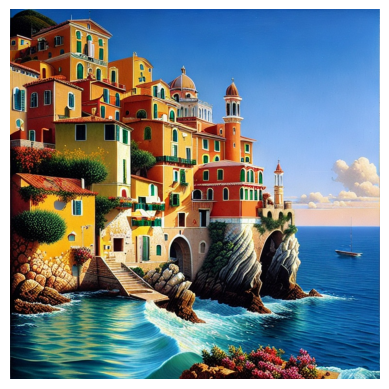

In [10]:
from PIL import Image
import io
import matplotlib.pyplot as plt

# Assuming orig_img_binary_data is the binary image data
orig_img_binary_data = ds['train'][0]['image_preferred']

# Convert binary data to a BytesIO object
image_stream = io.BytesIO(orig_img_binary_data)

# Open the image using PIL
image = Image.open(image_stream)

plt.axis('off')
plt.imshow(image)

# Ensure the image is in RGB mode
rgb_image = image.convert('RGB')

# Now `rgb_image` is a PIL.Image in RGB mode
# rgb_image.show()  # Optionally display the image


  0%|          | 0/100 [00:00<?, ?it/s]

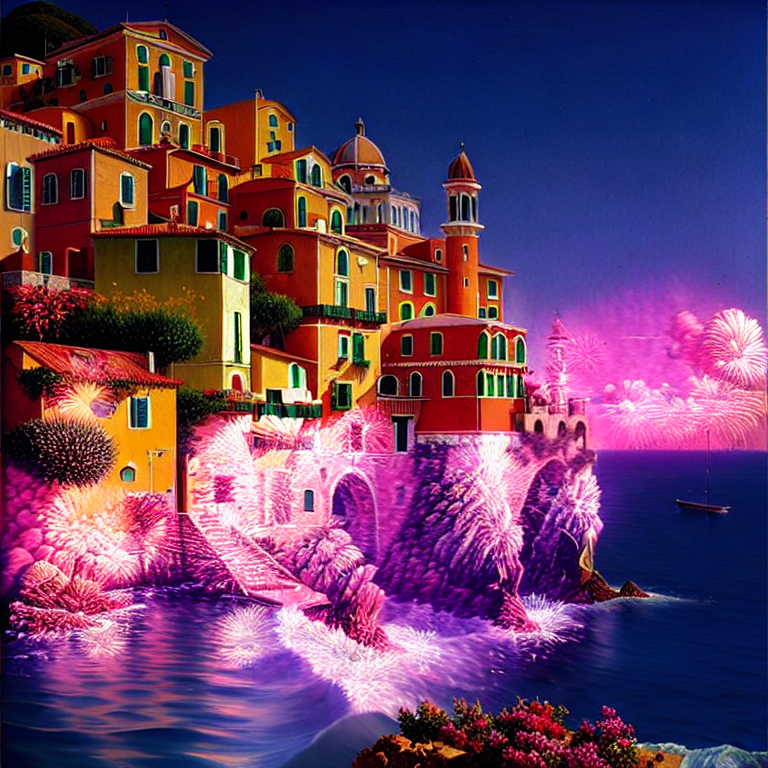

In [29]:
# `image` is an RGB PIL.Image
images = pipe("fireworks on the sky", image=rgb_image).images
images[0]